<a href="https://colab.research.google.com/github/shaking54/CS114.K21.KHTN/blob/master/Sarcasm_Headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd

data=pd.read_json('/content/drive/My Drive/Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
from google.colab import drive
#drive.mount('/content/drive')

In [0]:
sarcasm = data.drop(columns='article_link')

In [76]:
sarcasm.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [0]:
from sklearn.model_selection import train_test_split
X = sarcasm['headline']
y = sarcasm['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(analyzer='word')
X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)
#print(X_prepared)

In [79]:
print(len(vectorizer.vocabulary_))

21503


In [0]:
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features= 5000)
#X = tf.fit_transform(sarcasm['headline'])
#y = sarcasm['is_sarcastic']


In [81]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = clf.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
SCV_score = accuracy_score(y_test, y_predict
                        )
SCV_score

0.8452514663671534

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_predict = tree_clf.predict(X_test)
tree_score = accuracy_score(y_test, tree_predict)


In [85]:
tree_score

0.7571446399600649

In [86]:
from sklearn.ensemble import RandomForestClassifier
random_clf = DecisionTreeClassifier()
random_clf.fit(X_train, y_train)
random_predict = random_clf.predict(X_test)
random_score = accuracy_score(y_test, random_predict)
random_score

0.7586422064145764

<BarContainer object of 3 artists>

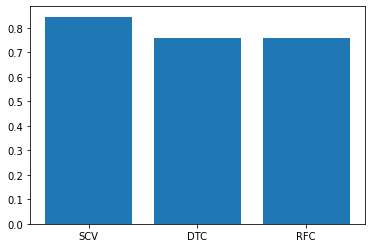

In [87]:
import matplotlib.pyplot as plt
#plt.plot(range(1))
plt.bar(['SCV', 'DTC', 'RFC'], [SCV_score, tree_score, random_score])